In [ ]:
!pip install opencv-python tensorflow

In [ ]:
import cv2
import base64
import numpy as np
from PIL import Image
import io
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow

<IPython.core.display.Javascript object>

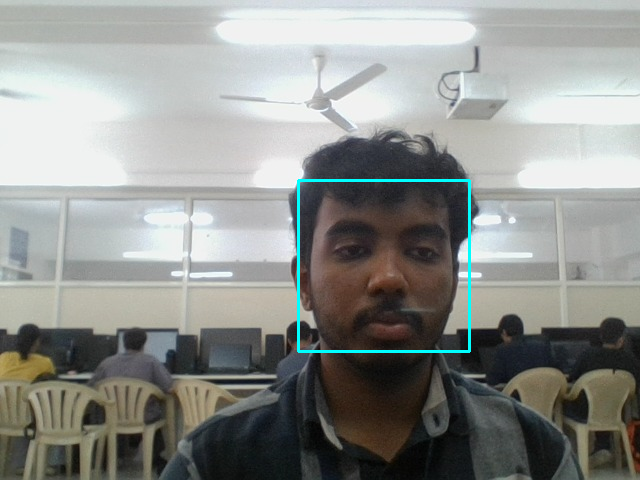

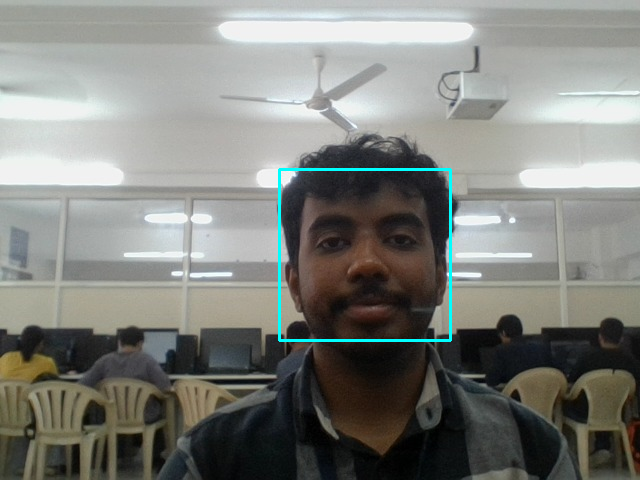

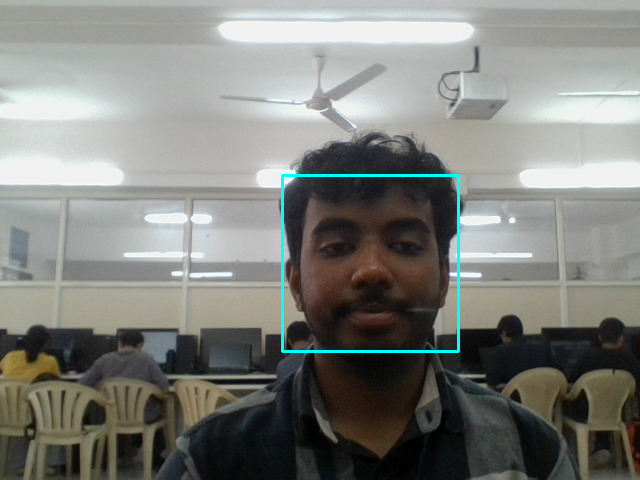

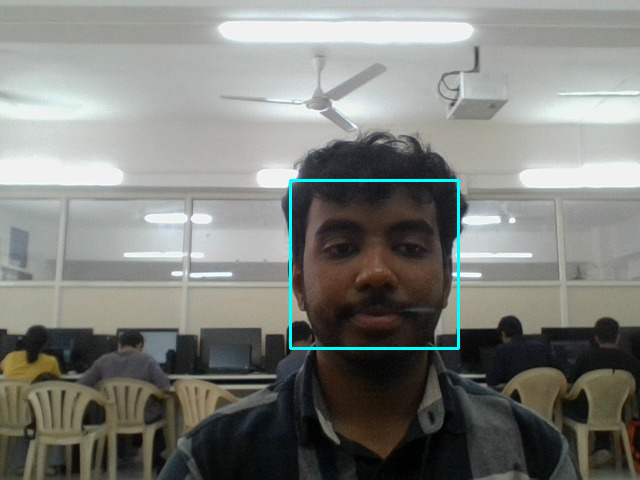

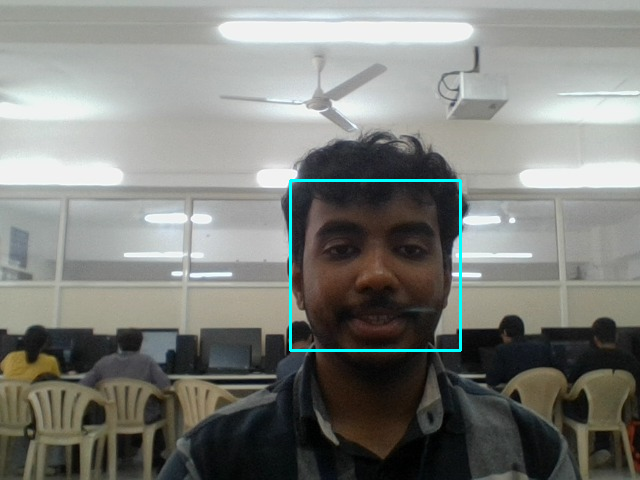

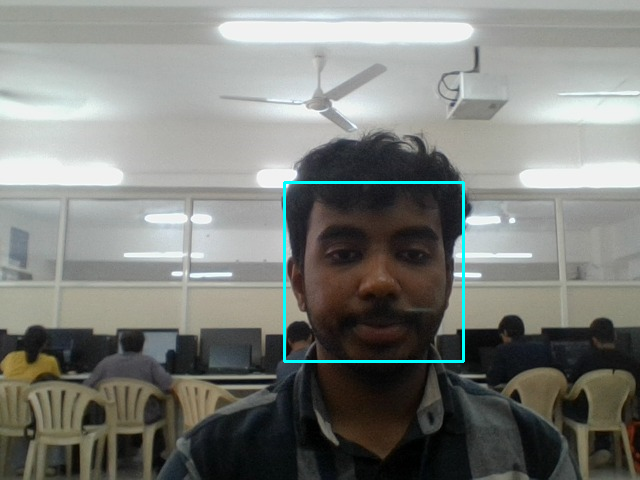

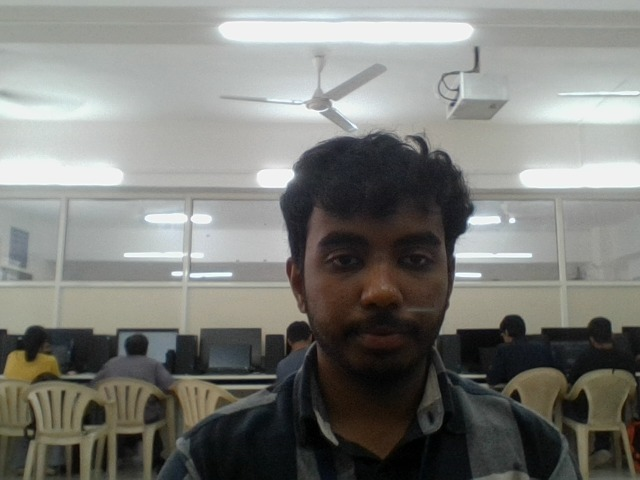

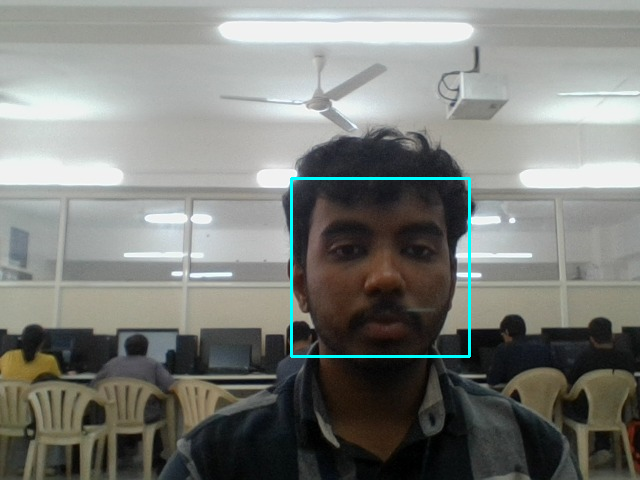

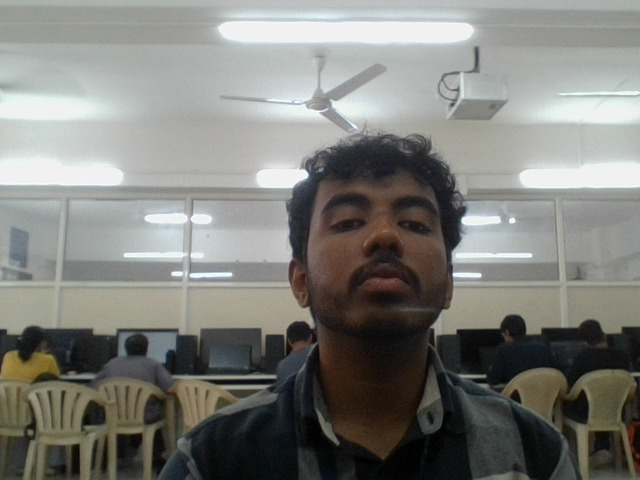

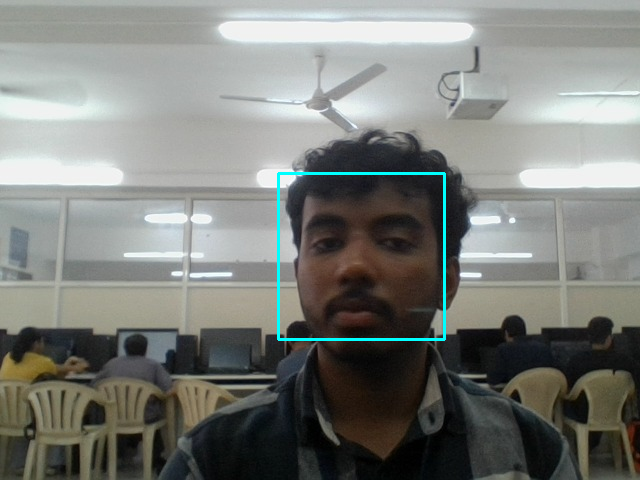

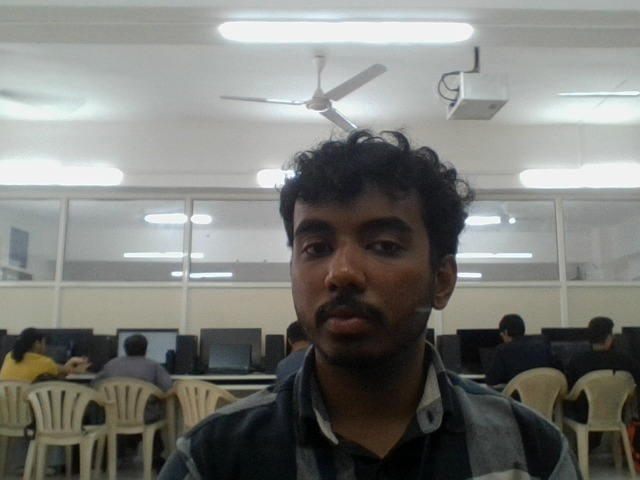

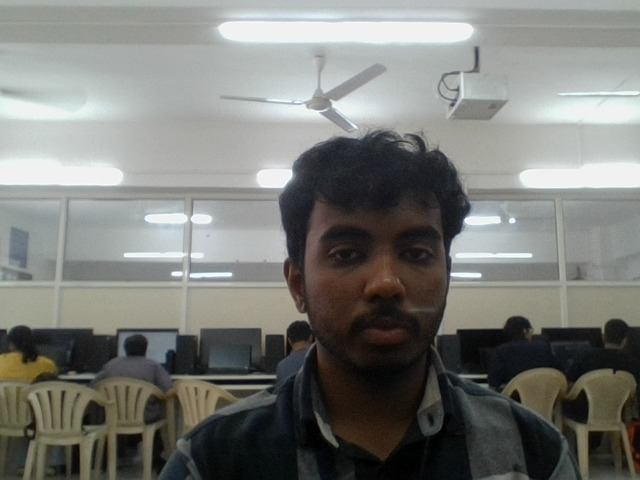

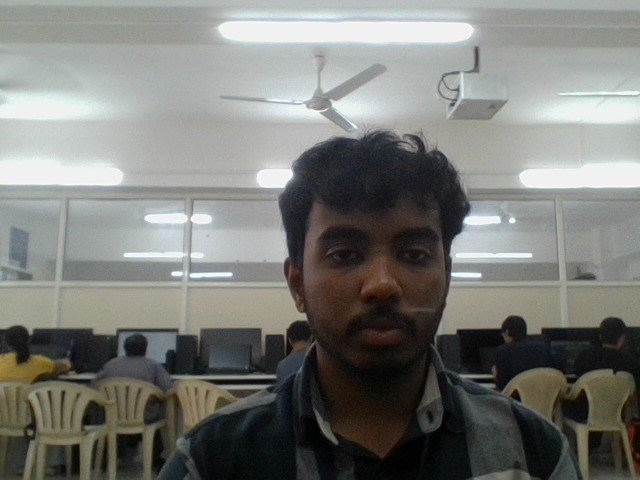

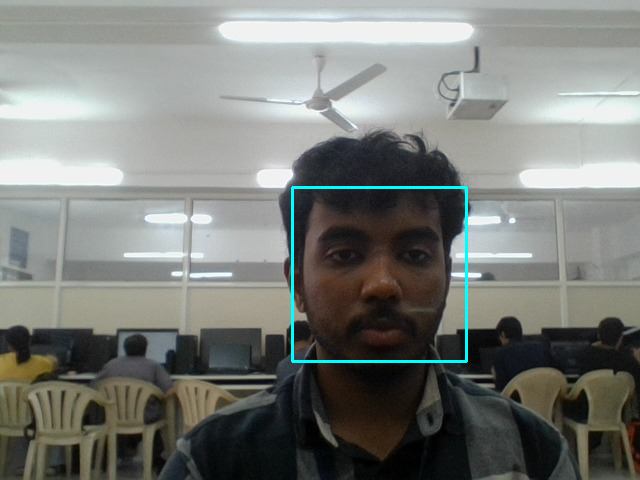

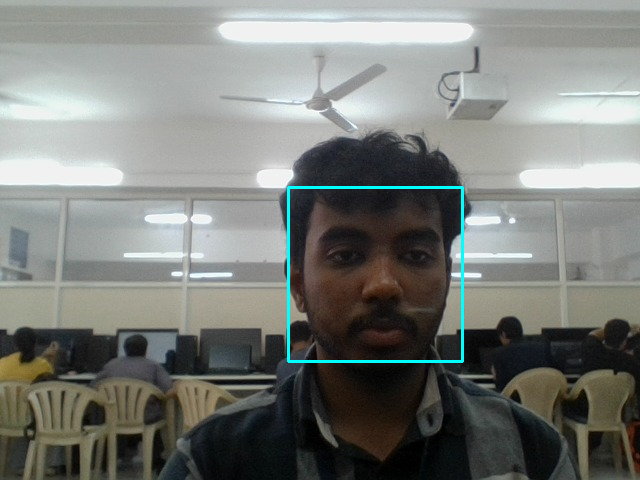

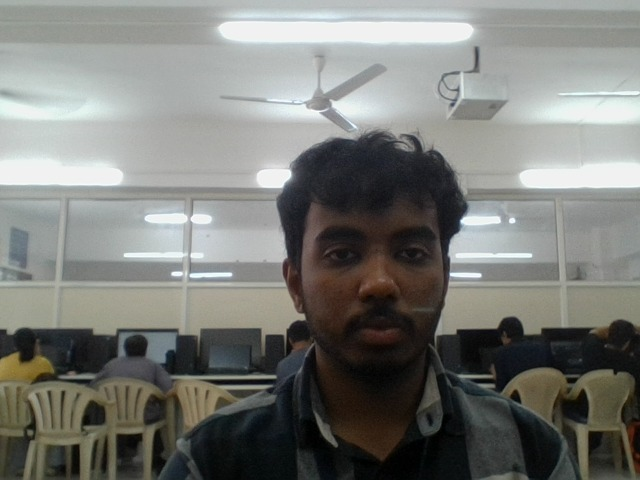

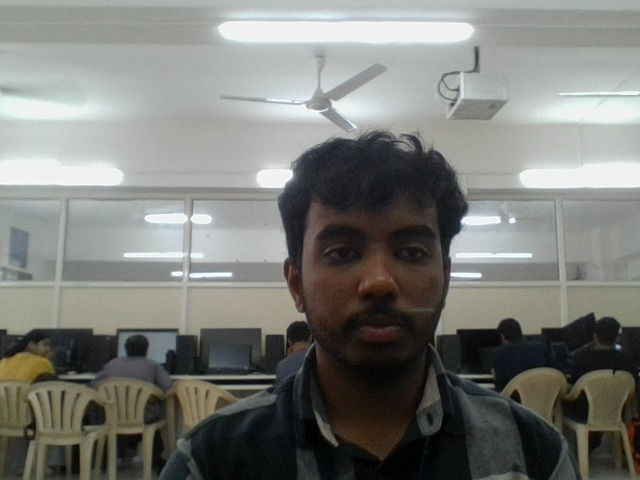

⏹ Stopped after 20 seconds


In [ ]:
import time

# JavaScript code to capture a photo using the webcam
js_code = '''
function initCamera() {
    return new Promise((resolve, reject) => {
        const video = document.createElement('video');
        video.style.display = 'none';
        document.body.appendChild(video);
        const streamPromise = navigator.mediaDevices.getUserMedia({video: true});
        streamPromise.then((stream) => {
            video.srcObject = stream;
            video.onloadedmetadata = () => {
                resolve(video);
            };
            video.play();
        }).catch((error) => {
            reject(error);
        });
    });
}

async function takePhoto() {
    const video = await initCamera();
    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    const context = canvas.getContext('2d');
    context.drawImage(video, 0, 0, canvas.width, canvas.height);
    const img = canvas.toDataURL('image/jpeg');
    return img;
}
'''

display(Javascript(js_code))

# Function to convert JavaScript captured image to OpenCV format
def js_to_image(js_reply):
    image_bytes = base64.b64decode(js_reply.split(',')[1])
    image_PIL = Image.open(io.BytesIO(image_bytes))
    image_np = np.array(image_PIL)
    frame = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    return frame

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start timer
start_time = time.time()
run_time = 20  # seconds

while True:
    # Stop after run_time seconds
    if time.time() - start_time > run_time:
        print("⏹ Stopped after 20 seconds")
        break

    # Capture image using the webcam
    js_reply = eval_js('takePhoto()')
    frame = js_to_image(js_reply)

    if frame is None:
        continue

    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2)

    # Display the image with detected faces
    cv2_imshow(frame)


In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Path to your dataset
dataset_path = '/content/data'
class_names = ['happy', 'sad']  # replace with your class names

# Create directories if they don't exist
for class_name in class_names:
    folder_path = os.path.join(dataset_path, class_name)
    os.makedirs(folder_path, exist_ok=True)

# Initialize data and labels lists
data = []
labels = []

# Load images
for class_index, class_name in enumerate(class_names):
    folder_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Check for valid image formats
            print(f"Skipping non-image file: {image_name}")
            continue
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")  # Print an error message
            continue
        # Convert to grayscale and resize in one step
        image = cv2.resize(image, (128, 128))  # Resize images to 128x128 pixels
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

        data.append(image)
        labels.append(class_index)

# Convert lists to numpy arrays
data = np.array(data, dtype="float") / 255.0  # Normalize pixel values
data = np.expand_dims(data, axis=-1)  # Add a channel dimension for grayscale

labels = np.array(labels)

# One-hot encode the labels
labels = to_categorical(labels, num_classes=2)

# Split the dataset into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

Skipping non-image file: cry-360x240.gif


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(128, 128, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,482,050 (32.36 MB)

 Trainable params: 8,482,050 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=32)

# Save the trained model
model.save('face_recognition_model.h5')

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4486 - loss: 0.9218 - val_accuracy: 0.4706 - val_loss: 0.7188
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5355 - loss: 0.7032 - val_accuracy: 0.5588 - val_loss: 0.6905
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1000ms/step - accuracy: 0.6443 - loss: 0.6813 - val_accuracy: 0.5882 - val_loss: 0.6817
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6211 - loss: 0.6599 - val_accuracy: 0.5588 - val_loss: 0.6909
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6864 - loss: 0.6311 - val_accuracy: 0.5882 - val_loss: 0.6759
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7133 - loss: 0.5929 - val_accuracy: 0.6176 - val_loss: 0.6646
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6950 - loss: 0.5773 - val_accuracy: 0.5882 - val_loss: 0.6924
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7404 - loss: 0.5546 - val_accuracy: 0.5882 - val_loss: 0.6659
Epoch 9

In [ ]:
loss, accuracy = model.evaluate(testX, testY)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6201 - loss: 0.6929 
Test Accuracy: 61.76%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: happy


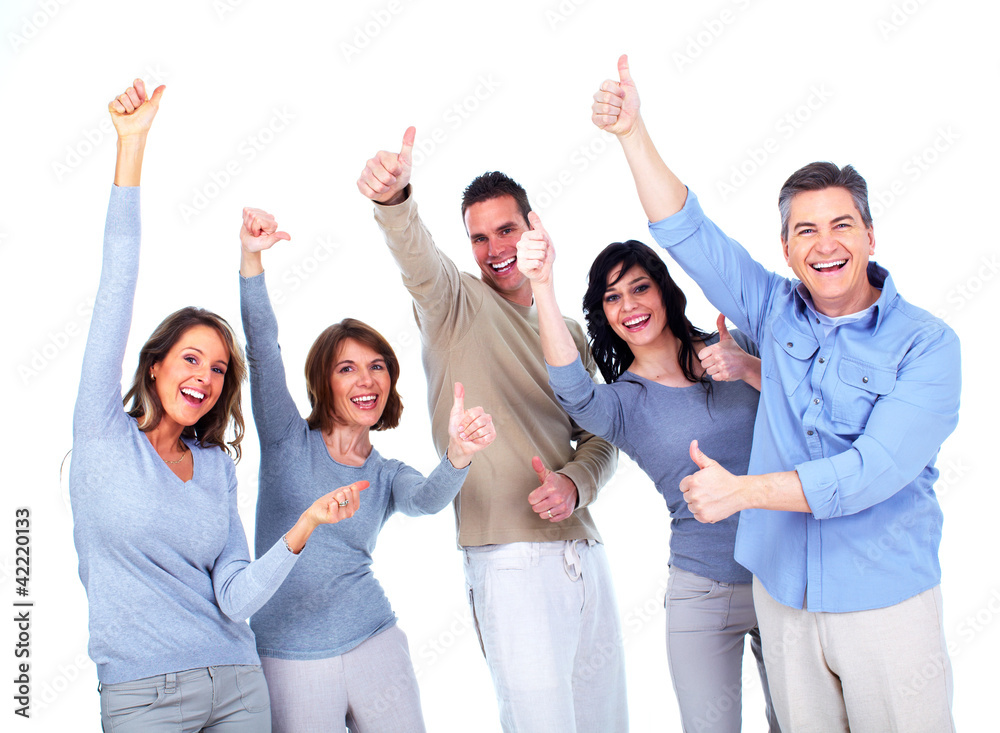

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load a single image and preprocess it
image_path = '/content/data/happy/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    image = cv2.resize(image, (128, 128))
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)   # Add batch dimension
    image = image.astype("float") / 255.0   # Normalize pixel values

    # Predict the class
    prediction = model.predict(image)
    predicted_class = class_names[np.argmax(prediction)]
    print(f"Predicted Class: {predicted_class}")

    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    cv2_imshow(img)